# Loan Payback Prediction

### Importing the Required Libraries and Loading the dataset

In [1]:
# Importing the Required Libraries 

import numpy as np 
import pandas as pd 
from pandas import plotting
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing the dataset
dataset = pd.read_csv('application_data.csv')
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


As the dataset is really huge, we would consider 5000 rows for further analysis.


In [3]:
df = dataset.iloc[:5001]

In [4]:
df.iloc[0:1,0:20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0


Convert categorical values to numeric values using one-hot encoding.

In [5]:
df = pd.get_dummies(df, columns=['CNT_CHILDREN','NAME_EDUCATION_TYPE',
                                 'CODE_GENDER','FLAG_OWN_CAR','NAME_CONTRACT_TYPE',
                                 'NAME_INCOME_TYPE'])

In [20]:
df.iloc[0:1,125:145]

,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
0,0,0,1,0,1,1,0,1,0,0,0,0,0,1


In [19]:
df.shape

(5001, 139)

In [21]:
x = df.loc[:,['AMT_CREDIT','AMT_INCOME_TOTAL','CNT_CHILDREN_0','CNT_CHILDREN_1','CNT_CHILDREN_2','CNT_CHILDREN_3',
              'CNT_CHILDREN_4','CNT_CHILDREN_5','CNT_CHILDREN_7','NAME_EDUCATION_TYPE_Academic degree',
              'NAME_EDUCATION_TYPE_Higher education','NAME_EDUCATION_TYPE_Incomplete higher',
              'NAME_EDUCATION_TYPE_Lower secondary','NAME_EDUCATION_TYPE_Secondary / secondary special',
              'CODE_GENDER_F','CODE_GENDER_M','FLAG_OWN_CAR_N','FLAG_OWN_CAR_Y',
              'NAME_CONTRACT_TYPE_Cash loans','NAME_CONTRACT_TYPE_Revolving loans',
              'NAME_INCOME_TYPE_Commercial associate','NAME_INCOME_TYPE_Pensioner',
              'NAME_INCOME_TYPE_State servant','NAME_INCOME_TYPE_Unemployed','NAME_INCOME_TYPE_Working']]

In [23]:
x.head()

,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_CHILDREN_0,CNT_CHILDREN_1,CNT_CHILDREN_2,CNT_CHILDREN_3,CNT_CHILDREN_4,CNT_CHILDREN_5,CNT_CHILDREN_7,NAME_EDUCATION_TYPE_Academic degree,...,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
0,406597.5,202500.0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1,1293502.5,270000.0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,135000.0,67500.0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
3,312682.5,135000.0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,513000.0,121500.0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [25]:
x.shape

(5001, 25)

In [28]:
y=df['TARGET']

In [29]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [30]:
y.shape

(5001,)

## Model Creation & Data Splitting And Scaling

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)

StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. 

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
scx.fit_transform(x_train)
scx.transform(x_test)

array([[ 0.3917966 ,  1.06074086,  0.66446644, ..., -0.26273316,
         0.        , -1.03607901],
       [ 1.32206293,  1.06074086,  0.66446644, ..., -0.26273316,
         0.        ,  0.96517736],
       [ 0.96813551,  0.7812056 ,  0.66446644, ..., -0.26273316,
         0.        ,  0.96517736],
       ...,
       [-1.3192703 , -0.84941674, -1.5049669 , ...,  3.80614315,
         0.        , -1.03607901],
       [-0.81348309, -0.43011386,  0.66446644, ..., -0.26273316,
         0.        ,  0.96517736],
       [-0.64488735, -0.56988148,  0.66446644, ..., -0.26273316,
         0.        , -1.03607901]])

### Receiver Operating Characteristic. 
On the Y axis here, we have the true positive rate, the positive predictions of our model that are correct, and on the X axis we have the false positive rate, the positive predictions of our model that are incorrect. For a good classification model, we want the true positive rate to be as high as possible. That's pretty obvious. In addition, we want the false positive rate to be as low as possible. Once again, pretty obvious. This curve that we'll draw here, true positive rate versus false positive rate, is the ROC curve, or the Receiver Operating Characteristic.



Pick the top-left corner point as P threshold. At the top-left corner, you have that value for threshold, which maximizes the true positives in your model and minimizes the false positives. This is how the ROC curve will help you find the right precision threshold and the best possible model for your data.

### Logistic Regression Classifier
Logistic regression involves finding the best fit S-curve. The output of logistic regression is a probability score.

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
print('Training Accuracy: ',model.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred)*100)
a_lg=accuracy_score(y_test,y_pred)
confusion_mat=confusion_matrix(y_test,y_pred)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred))
print('\nMean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Training Accuracy:  92.28571428571428
Testing Accuracy:  92.27181878747501

Confusionn Matrix:
 [[1385    0]
 [ 116    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1385
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1501
   macro avg       0.46      0.50      0.48      1501
weighted avg       0.85      0.92      0.89      1501


Mean Absolute Error:  0.07728181212524983
Root Mean Squared Error 0.27799606494562085


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

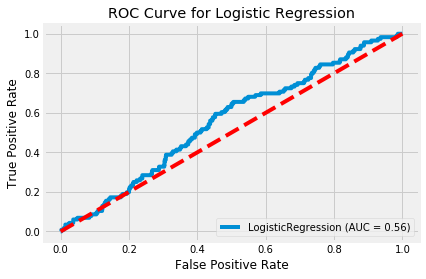

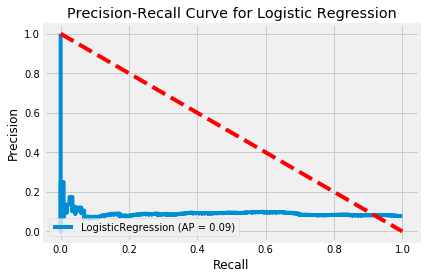

In [34]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(model, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Logistic Regression')
plot_precision_recall_curve(model, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for Logistic Regression')

### Support Vector Classifier
The objective of SVM classifier is to find that hyperplane that best separates points in a hypercube.

In [35]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(x_train, y_train)
y_pred1 = svc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
print('Training Accuracy: ',svc.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred1)*100)
a_svc=accuracy_score(y_test,y_pred1)
confusion_mat=confusion_matrix(y_test,y_pred1)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred1))
print('\nMean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

Training Accuracy:  92.28571428571428
Testing Accuracy:  92.27181878747501

Confusionn Matrix:
 [[1385    0]
 [ 116    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1385
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1501
   macro avg       0.46      0.50      0.48      1501
weighted avg       0.85      0.92      0.89      1501


Mean Absolute Error:  0.07728181212524983
Root Mean Squared Error:  0.27799606494562085


Text(0.5, 1.0, 'Precision-Recall Curve for SVM')

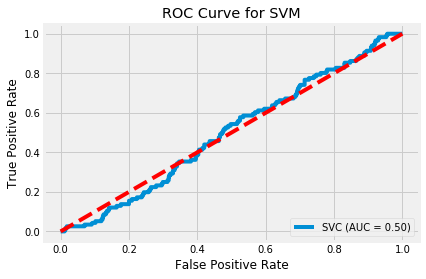

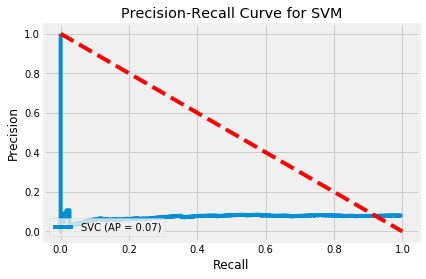

In [36]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(svc, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for SVM')

plot_precision_recall_curve(svc, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for SVM')

### KNeighbors Classifier
K-nearest-neighbors classification where you don't look at just one data point to classify the incoming sample, you look at K-nearest-neighbors.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()
model1.fit(x_train,y_train)
y_pred2=model1.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Training Accuracy: ',model1.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred2)*100)
a_knn=accuracy_score(y_test,y_pred2)
confusion_mat=confusion_matrix(y_test,y_pred2)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred2))
print('\nMean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred2))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Training Accuracy:  92.28571428571428
Testing Accuracy:  92.1385742838108

Confusionn Matrix:
 [[1383    2]
 [ 116    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1385
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1501
   macro avg       0.46      0.50      0.48      1501
weighted avg       0.85      0.92      0.88      1501


Mean Absolute Error:  0.07861425716189208
Root Mean Squared Error:  0.28038234103076476


Text(0.5, 1.0, 'Precision-Recall Curve for KNeighborsClassifier')

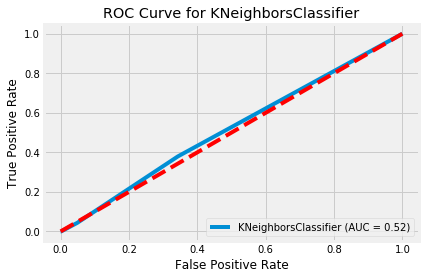

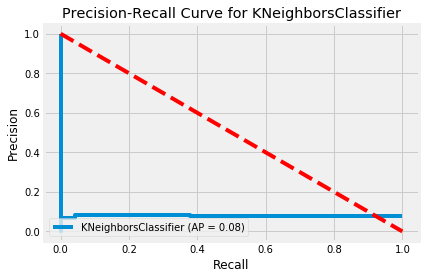

In [39]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(model1, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for KNeighborsClassifier')

plot_precision_recall_curve(model1, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for KNeighborsClassifier')

### Naive Bayes
The Naive Bayes' classifier uses Bayes' theorem of conditional probabilities for classification.

In [40]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x_train, y_train)
y_pred3 = model2.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Training Accuracy: ',model2.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred3)*100)
a_gnb=accuracy_score(y_test,y_pred3)
confusion_mat=confusion_matrix(y_test,y_pred3)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred3))
print('\nMean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred3))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

Training Accuracy:  92.28571428571428
Testing Accuracy:  92.27181878747501

Confusionn Matrix:
 [[1385    0]
 [ 116    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1385
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1501
   macro avg       0.46      0.50      0.48      1501
weighted avg       0.85      0.92      0.89      1501


Mean Absolute Error:  0.07728181212524983
Root Mean Squared Error 0.27799606494562085


Text(0.5, 1.0, 'Precision-Recall Curve for Naive Bayes')

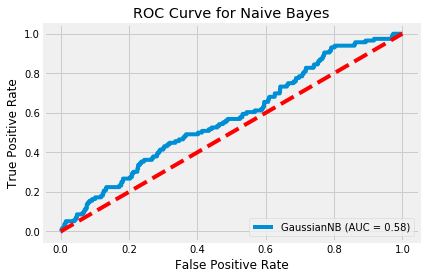

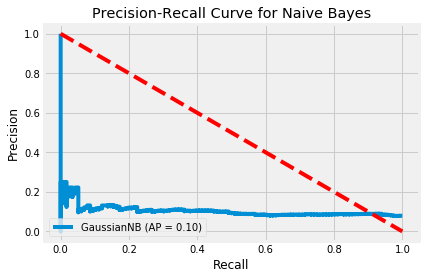

In [42]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(model2, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Naive Bayes')

plot_precision_recall_curve(model2, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for Naive Bayes')

### Decision Tree Classifier
Decision Tree  set up a tree structure on your training data and this tree structure helps makes decisions based on rules that it has gleaned.

In [43]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0,max_depth=6)
decisiontree.fit(x_train, y_train)
y_pred5 = decisiontree.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Training Accuracy: ',decisiontree.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred5)*100)
a_dtc=accuracy_score(y_test,y_pred5)
confusion_mat=confusion_matrix(y_test,y_pred5)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred5))
print('\nMean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred5))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

Training Accuracy:  92.57142857142857
Testing Accuracy:  91.93870752831445

Confusionn Matrix:
 [[1380    5]
 [ 116    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1385
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1501
   macro avg       0.46      0.50      0.48      1501
weighted avg       0.85      0.92      0.88      1501


Mean Absolute Error:  0.08061292471685542
Root Mean Squared Error 0.28392415310581703


Text(0.5, 1.0, 'Precision-Recall Curve for Decision Tree')

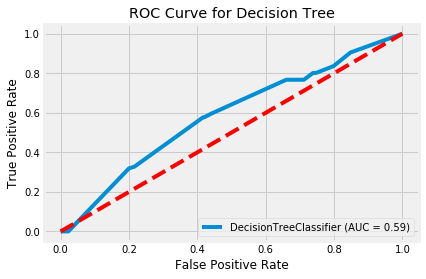

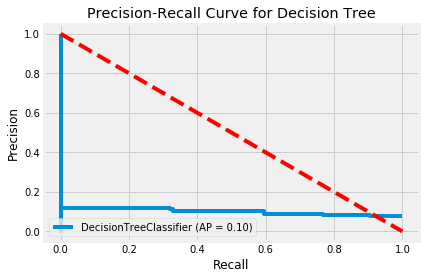

In [44]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(decisiontree, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Decision Tree')

plot_precision_recall_curve(decisiontree, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for Decision Tree')

In [45]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Naive Bayes','Decision Tree'],
    'Score': [a_svc, a_knn, a_lg, a_gnb,a_dtc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.922718
2,Logistic Regression,0.922718
3,Naive Bayes,0.922718
1,KNN,0.921386
4,Decision Tree,0.919387


From the above mentioned various models we can clearly observe that Support Vector Machines Model is the best model.